# *1．要点*


●誤差勾配の計算

$\frac{\partial E}{\partial w} $ の計算方法

・数値微分

$ \frac{\partial E}{\partial w_m} = \frac{E(w_m + h) - E(w_m -h)}{2h}$

数値微分は各パラメータ$w_m$それぞれについて$E(w_m -h)$や$ E(w_m + h)$を計算するために順伝播の計算を繰り返し行う必要があるため計算負荷が大きいデメリットがある

・誤差逆伝播法

算出された誤差を出力層側から順に微分し前の層前の層へと伝播する

最小限の計算で各パラメータでの微分値を**解析的**に計算する手法



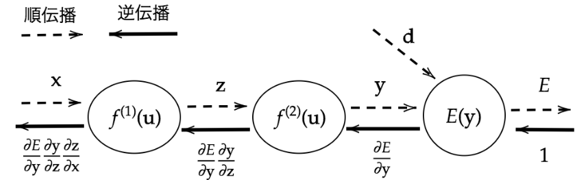

微分の連鎖率により$\frac{\partial E}{\partial y}$から$\frac{\partial E}{\partial w}$　および　$\frac{\partial E}{\partial b}$ を求めることができる



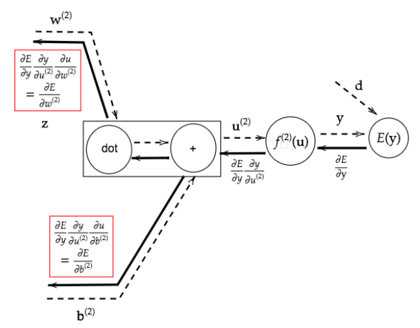

# *2．確認テスト*

**確認テスト　誤差逆伝播法では不要な再帰的処理を避けることができる。既に行った計算結果を保持しているソースコードを抽出せよ**

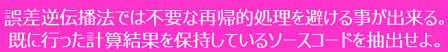

**解答**

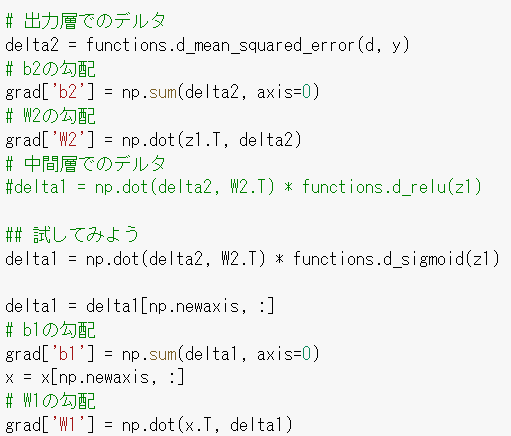

**確認テスト**

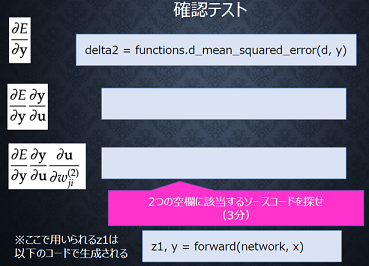

**解答**

$\frac{\partial E}{\partial y} $： delta2 = functions.d_mean_squared_error(d, y)

$\frac{\partial E}{\partial y}\frac{\partial y}{\partial u} $：delta2 = functions.d_mean_squared_error(d, y)

$\frac{\partial E}{\partial y}\frac{\partial y}{\partial u}\frac{\partial u}{\partial w_{ji}^{(2)}} $：grad['W2'] = np.dot(z1.T, delta2)

# *3．実装演習*

# *準備*

## Googleドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/E/stage3/DNN_code_colab_lesson_1_2')

# importと関数定義

In [ ]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")


# 確率勾配降下法

ストリーミング出力は最後の 5000 行に切り捨てられました。
[[-0.01127481  0.00735735  0.00553997 -0.00265486  0.00329341  0.01182799
  -0.00110715 -0.00581808  0.00490363 -0.00202167]
 [-0.01485576  0.00969409  0.00729949 -0.00349806  0.00433941  0.01558464
  -0.00145878 -0.00766593  0.00646105 -0.00266376]]

*** 偏微分_重み2 ***
[-0.06184231  0.          0.          0.          0.          0.
 -0.02415031 -0.03026377  0.          0.        ]

*** 偏微分_バイアス1 ***
[-0.01485738  0.00969515  0.00730029 -0.00349844  0.00433988  0.01558634
 -0.00145894 -0.00766677  0.00646176 -0.00266406]

*** 偏微分_バイアス2 ***
-0.04065940140535407

*** 偏微分_重み1 ***
[[-2.25867292e-03  1.28927655e-03  9.70804071e-04 -4.65228337e-04
   5.77124696e-04  2.07269562e-03 -1.76531349e-04 -1.06651355e-03
   8.59294814e-04 -3.54270322e-04]
 [-8.15412310e-04  4.65446748e-04  3.50473759e-04 -1.67953894e-04
   2.08350035e-04  7.48271920e-04 -6.37302699e-05 -3.85026211e-04
   3.10217368e-04 -1.27896509e-04]]

*** 偏微分_重み2 ***
[-0.0071941   0.          0.      

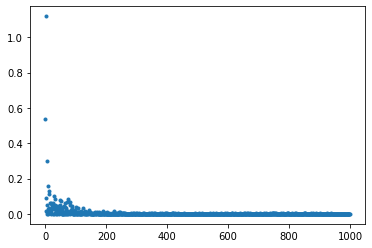

In [ ]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

# *4．まとめ・演習*

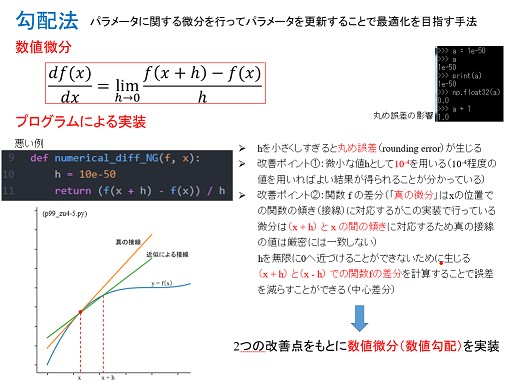

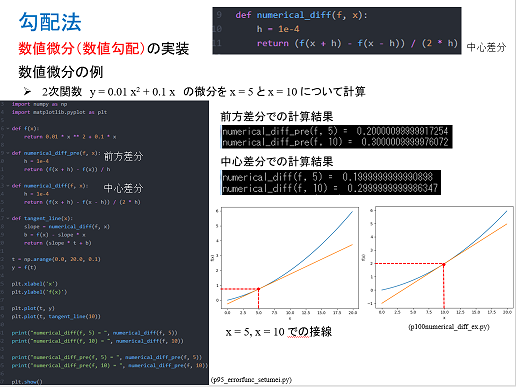

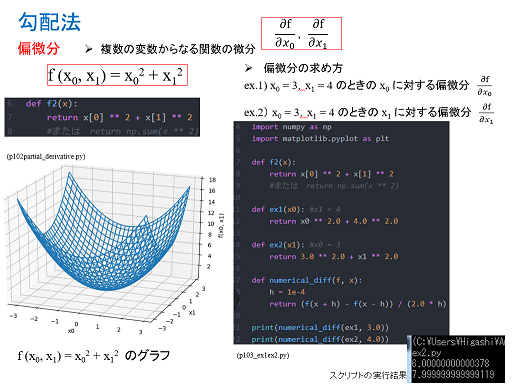

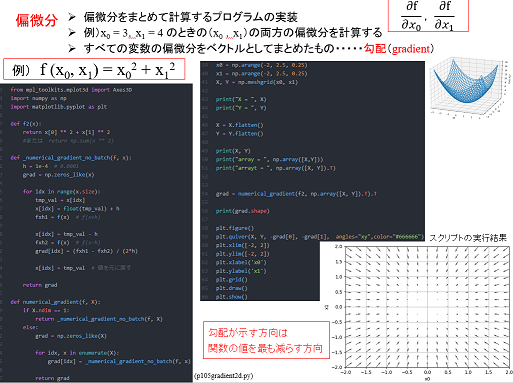

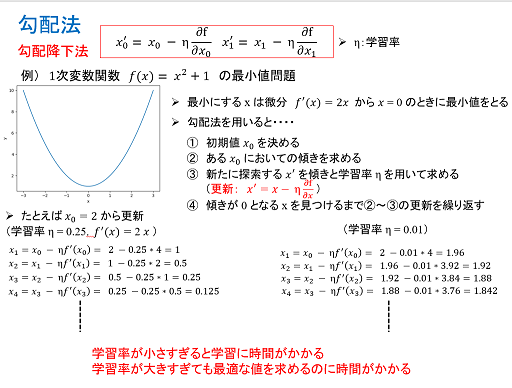

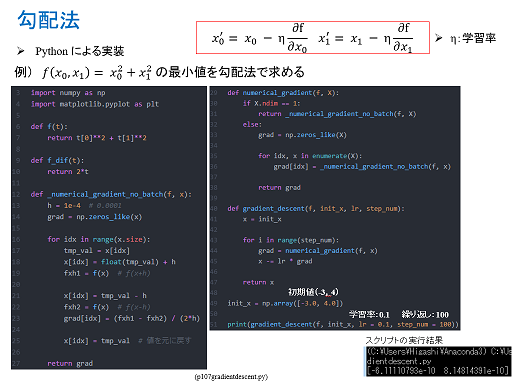

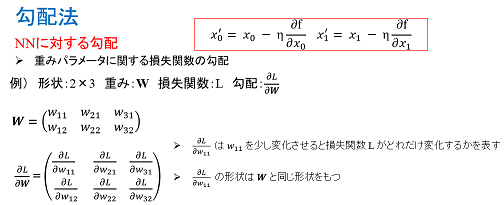

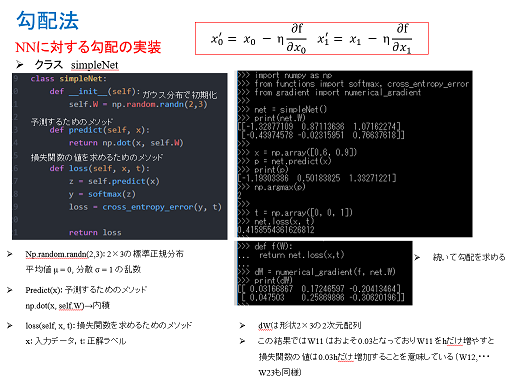